In [63]:
## Homework 3 code
#Jiaming Zhou
# Reference: https://towardsdatascience.com/lstm-time-series-forecasting-predicting-stock-prices-using-an-lstm-model- 6223e9644a2f


import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df=pd.read_csv("TSLA.csv")
print('Number of rows and columns:', df.shape)
df.head(5)

Number of rows and columns: (1328, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-09,51.816002,52.590000,51.358002,51.584000,51.584000,16670500
1,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
2,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
3,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
4,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000


In [64]:
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

In [11]:
## 4 hidden layers, 1 day lag
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)

(740, 60, 1)


In [6]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 2s 92ms/step - loss: 0.0564
Epoch 2/100
24/24 [==============================] - 2s 81ms/step - loss: 0.0174
Epoch 3/100
24/24 [==============================] - 2s 86ms/step - loss: 0.0134
Epoch 4/100
24/24 [==============================] - 2s 79ms/step - loss: 0.0123
Epoch 5/100
24/24 [==============================] - 2s 76ms/step - loss: 0.0127
Epoch 6/100
24/24 [==============================] - 2s 77ms/step - loss: 0.0116
Epoch 7/100
24/24 [==============================] - 2s 79ms/step - loss: 0.0115
Epoch 8/100
24/24 [==============================] - 2s 91ms/step - loss: 0.0122
Epoch 9/100
24/24 [==============================] - 2s 85ms/step - loss: 0.0107
Epoch 10/100
24/24 [==============================] - 2s 82ms/step - loss: 0.0102
Epoch 11/100
24/24 [==============================] - 2s 90ms/step - loss: 0.0108
Epoch 12/100
24/24 [==============================] - 2s 83ms/step - loss: 0.0094
Epoch 13/100
24/24 [=====

In [26]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 588):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(528, 60, 1)


In [27]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


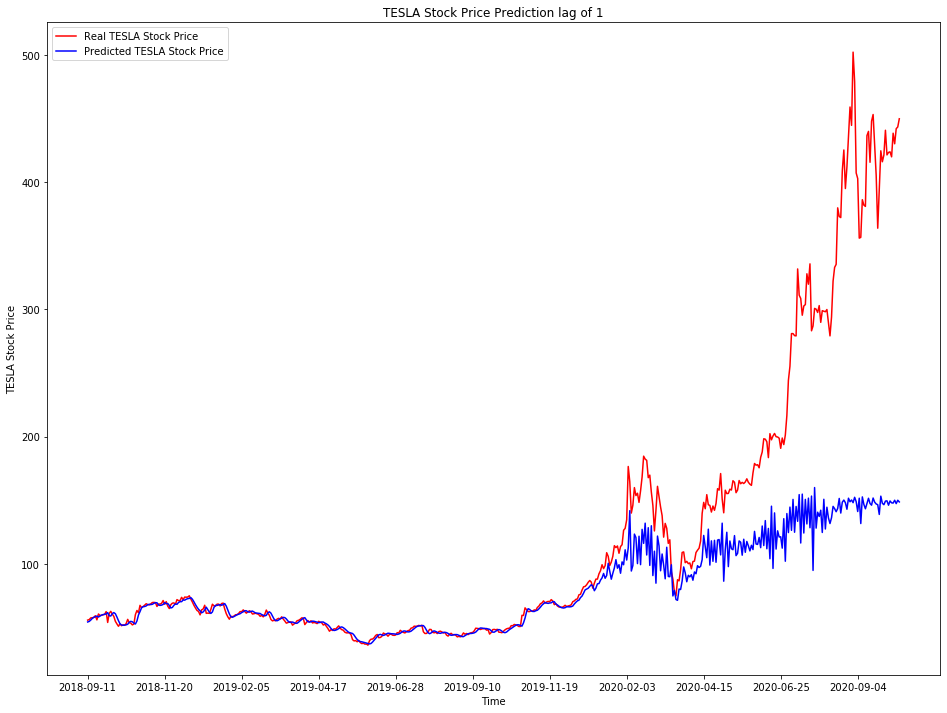

In [53]:
# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,528,50))
plt.title('TESLA Stock Price Prediction lag of 1')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
figure = plt.gcf()
figure.set_size_inches(16,12)
plt.savefig('1day_lag 4_layers dropout_0.2.jpg', dpi = 100)
plt.show()

Epoch 1/100
24/24 [==============================] - 2s 84ms/step - loss: 0.0753
Epoch 2/100
24/24 [==============================] - 2s 79ms/step - loss: 0.0203
Epoch 3/100
24/24 [==============================] - 2s 83ms/step - loss: 0.0140
Epoch 4/100
24/24 [==============================] - 2s 74ms/step - loss: 0.0134
Epoch 5/100
24/24 [==============================] - 2s 96ms/step - loss: 0.0129
Epoch 6/100
24/24 [==============================] - 2s 73ms/step - loss: 0.0124
Epoch 7/100
24/24 [==============================] - 2s 80ms/step - loss: 0.0121
Epoch 8/100
24/24 [==============================] - 2s 87ms/step - loss: 0.0112
Epoch 9/100
24/24 [==============================] - 2s 79ms/step - loss: 0.0117
Epoch 10/100
24/24 [==============================] - 2s 79ms/step - loss: 0.0096
Epoch 11/100
24/24 [==============================] - 2s 90ms/step - loss: 0.0107
Epoch 12/100
24/24 [==============================] - 2s 68ms/step - loss: 0.0098
Epoch 13/100
24/24 [=====

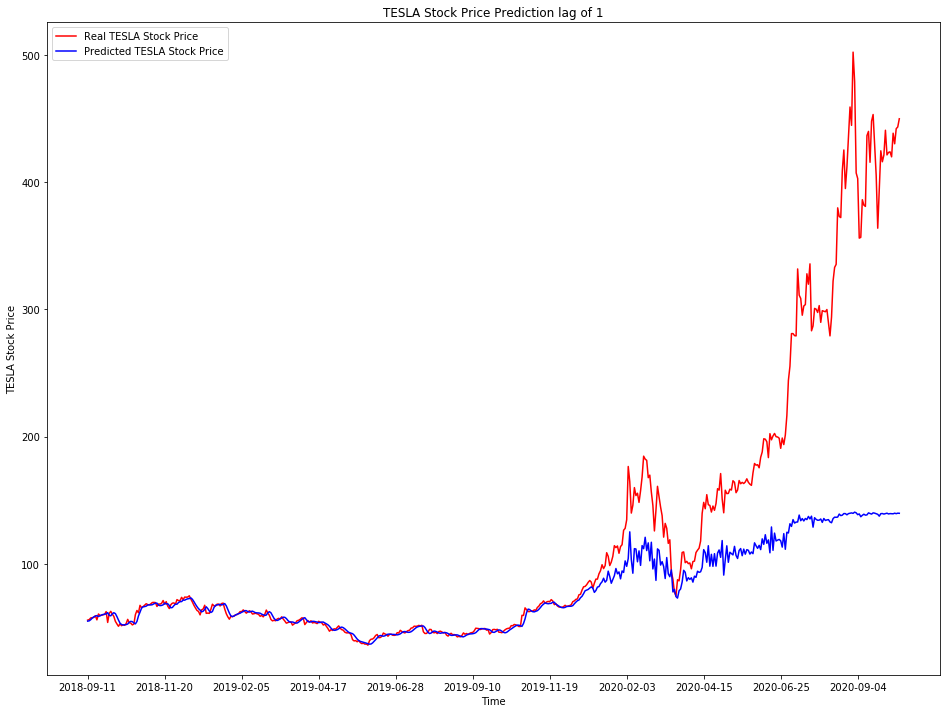

In [68]:
## 4 hidden layers, 7 days lag
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-53:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 588):
    X_test.append(inputs[i-53:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


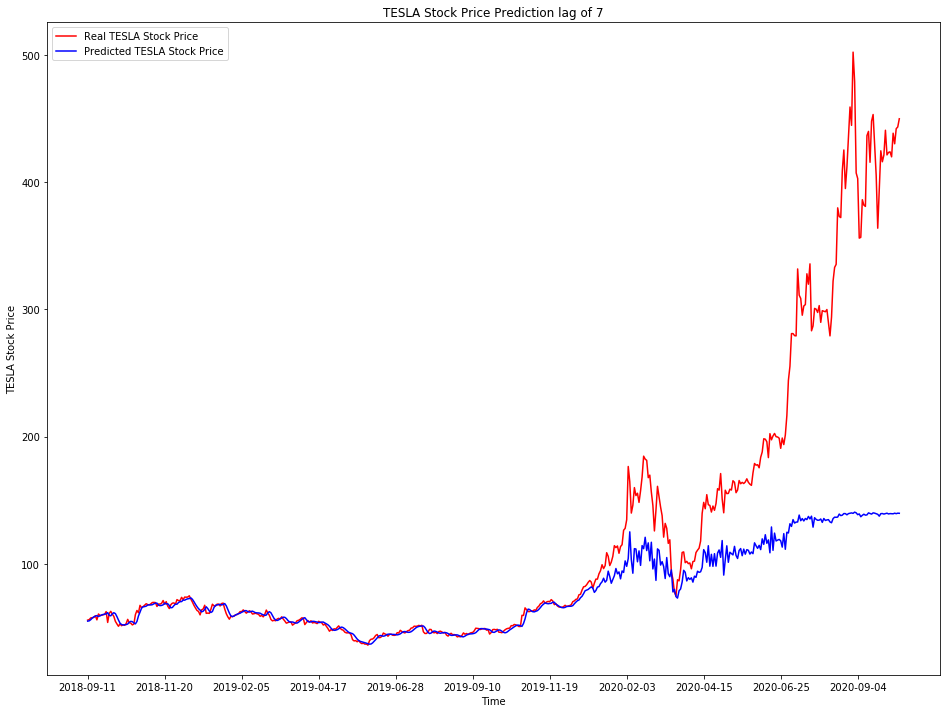

In [69]:
# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,528,50))
plt.title('TESLA Stock Price Prediction lag of 7')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
figure = plt.gcf()
figure.set_size_inches(16,12)
plt.savefig('7days_lag 4_layers dropout_0.2.jpg', dpi = 100)
plt.show()

Epoch 1/100
24/24 [==============================] - 2s 96ms/step - loss: 0.0650
Epoch 2/100
24/24 [==============================] - 3s 105ms/step - loss: 0.0157
Epoch 3/100
24/24 [==============================] - 2s 70ms/step - loss: 0.0129
Epoch 4/100
24/24 [==============================] - 1s 61ms/step - loss: 0.0120
Epoch 5/100
24/24 [==============================] - 2s 70ms/step - loss: 0.0114
Epoch 6/100
24/24 [==============================] - 2s 68ms/step - loss: 0.0120
Epoch 7/100
24/24 [==============================] - 2s 71ms/step - loss: 0.0114
Epoch 8/100
24/24 [==============================] - 1s 61ms/step - loss: 0.0109
Epoch 9/100
24/24 [==============================] - 2s 67ms/step - loss: 0.0100
Epoch 10/100
24/24 [==============================] - 2s 70ms/step - loss: 0.0110
Epoch 11/100
24/24 [==============================] - 2s 70ms/step - loss: 0.0111
Epoch 12/100
24/24 [==============================] - 2s 75ms/step - loss: 0.0098
Epoch 13/100
24/24 [====

24/24 [==============================] - 1s 58ms/step - loss: 0.0026


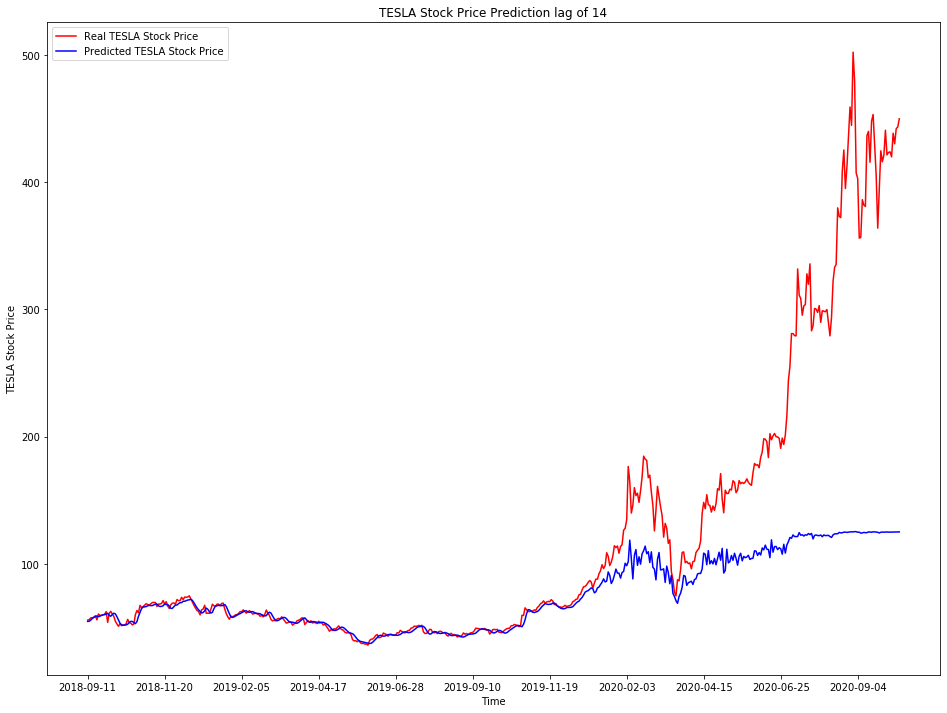

In [70]:
## 4 hidden layers, 14 days lag
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-46:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 588):
    X_test.append(inputs[i-46:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,528,50))
plt.title('TESLA Stock Price Prediction lag of 14')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
figure = plt.gcf()
figure.set_size_inches(16,12)
plt.savefig('14days_lag 4_layers dropout_0.2.jpg', dpi = 100)
plt.show()

Epoch 1/100
24/24 [==============================] - 3s 125ms/step - loss: 0.0698
Epoch 2/100
24/24 [==============================] - 3s 107ms/step - loss: 0.0187
Epoch 3/100
24/24 [==============================] - 3s 104ms/step - loss: 0.0166
Epoch 4/100
24/24 [==============================] - 2s 94ms/step - loss: 0.0153
Epoch 5/100
24/24 [==============================] - 2s 97ms/step - loss: 0.0152
Epoch 6/100
24/24 [==============================] - 2s 101ms/step - loss: 0.0150
Epoch 7/100
24/24 [==============================] - 3s 125ms/step - loss: 0.0145
Epoch 8/100
24/24 [==============================] - 3s 137ms/step - loss: 0.0134
Epoch 9/100
24/24 [==============================] - 4s 172ms/step - loss: 0.0166
Epoch 10/100
24/24 [==============================] - 3s 110ms/step - loss: 0.0144
Epoch 11/100
24/24 [==============================] - 3s 110ms/step - loss: 0.0134
Epoch 12/100
24/24 [==============================] - 2s 101ms/step - loss: 0.0121
Epoch 13/100
24

24/24 [==============================] - 3s 122ms/step - loss: 0.0041


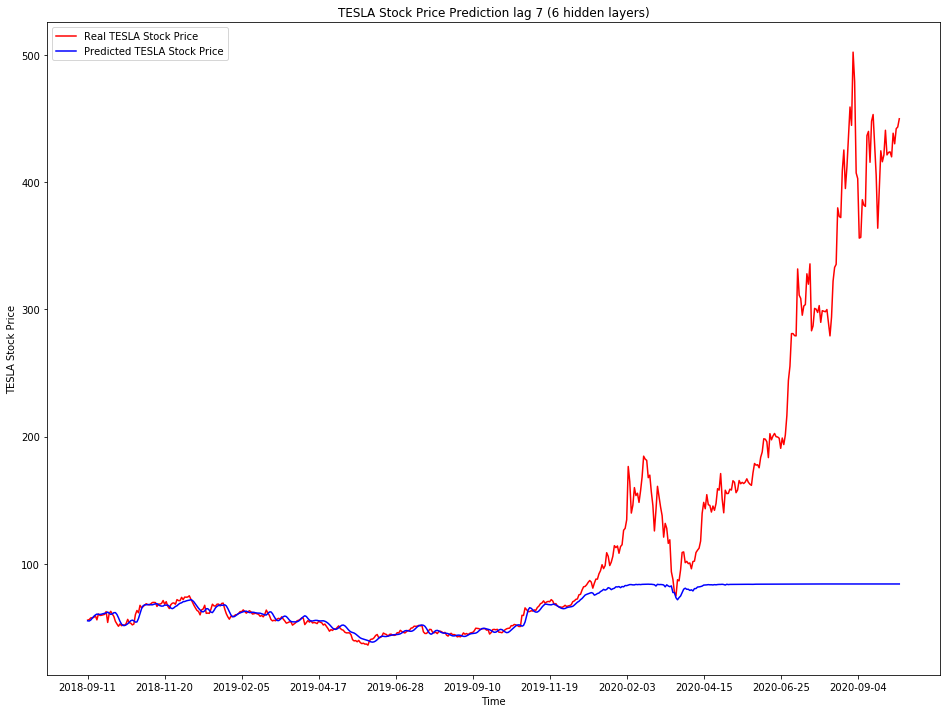

In [71]:
## 6 hidden layers, 7 days lag
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-53:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
## Adding a fifth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a sixth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 588):
    X_test.append(inputs[i-53:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,528,50))
plt.title('TESLA Stock Price Prediction lag 7 (6 hidden layers)')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
figure = plt.gcf()
figure.set_size_inches(16,12)
plt.savefig('7days_lag 6_layers dropout_0.2.jpg', dpi = 100)
plt.show()

Epoch 1/100
24/24 [==============================] - 3s 128ms/step - loss: 0.0818
Epoch 2/100
24/24 [==============================] - 4s 155ms/step - loss: 0.0192
Epoch 3/100
24/24 [==============================] - 4s 158ms/step - loss: 0.0177
Epoch 4/100
24/24 [==============================] - 3s 142ms/step - loss: 0.0172
Epoch 5/100
24/24 [==============================] - 3s 146ms/step - loss: 0.0147
Epoch 6/100
24/24 [==============================] - 3s 126ms/step - loss: 0.0186
Epoch 7/100
24/24 [==============================] - 3s 129ms/step - loss: 0.0159
Epoch 8/100
24/24 [==============================] - 3s 143ms/step - loss: 0.0145
Epoch 9/100
24/24 [==============================] - 3s 120ms/step - loss: 0.0134
Epoch 10/100
24/24 [==============================] - 3s 130ms/step - loss: 0.0128
Epoch 11/100
24/24 [==============================] - 3s 122ms/step - loss: 0.0123
Epoch 12/100
24/24 [==============================] - 3s 132ms/step - loss: 0.0121
Epoch 13/100


24/24 [==============================] - 4s 150ms/step - loss: 0.0041
Epoch 100/100
24/24 [==============================] - 4s 170ms/step - loss: 0.0036


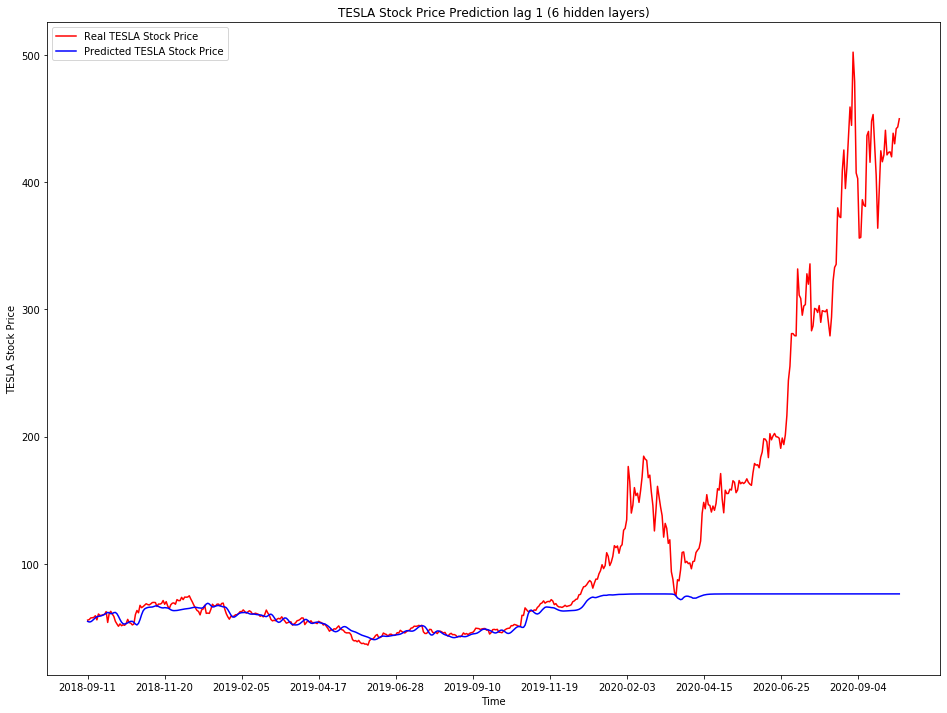

In [72]:
## 6 hidden layers, 1 days lag
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
## Adding a fifth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a sixth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 588):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,528,50))
plt.title('TESLA Stock Price Prediction lag 1 (6 hidden layers)')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
figure = plt.gcf()
figure.set_size_inches(16,12)
plt.savefig('1days_lag 6_layers dropout_0.2.jpg', dpi = 100)
plt.show()

In [51]:
## 6 hidden layers, 14 days lag
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-46:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
## Adding a fifth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a sixth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 588):
    X_test.append(inputs[i-46:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,528,50))
plt.title('TESLA Stock Price Prediction lag 14 (6 hidden layers)')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
figure = plt.gcf()
figure.set_size_inches(16,12)
plt.savefig('14days_lag 6_layers dropout_0.2.jpg', dpi = 100)
plt.show()

range(2, 5)


Epoch 1/100
24/24 [==============================] - 3s 105ms/step - loss: 0.0795
Epoch 2/100
24/24 [==============================] - 2s 78ms/step - loss: 0.0234
Epoch 3/100
24/24 [==============================] - 2s 71ms/step - loss: 0.0172
Epoch 4/100
24/24 [==============================] - 2s 72ms/step - loss: 0.0187
Epoch 5/100
24/24 [==============================] - 2s 68ms/step - loss: 0.0164
Epoch 6/100
24/24 [==============================] - 2s 68ms/step - loss: 0.0166
Epoch 7/100
24/24 [==============================] - 2s 69ms/step - loss: 0.0159
Epoch 8/100
24/24 [==============================] - 2s 69ms/step - loss: 0.0135
Epoch 9/100
24/24 [==============================] - 2s 68ms/step - loss: 0.0144
Epoch 10/100
24/24 [==============================] - 2s 68ms/step - loss: 0.0152
Epoch 11/100
24/24 [==============================] - 2s 69ms/step - loss: 0.0215
Epoch 12/100
24/24 [==============================] - 2s 80ms/step - loss: 0.0138
Epoch 13/100
24/24 [====

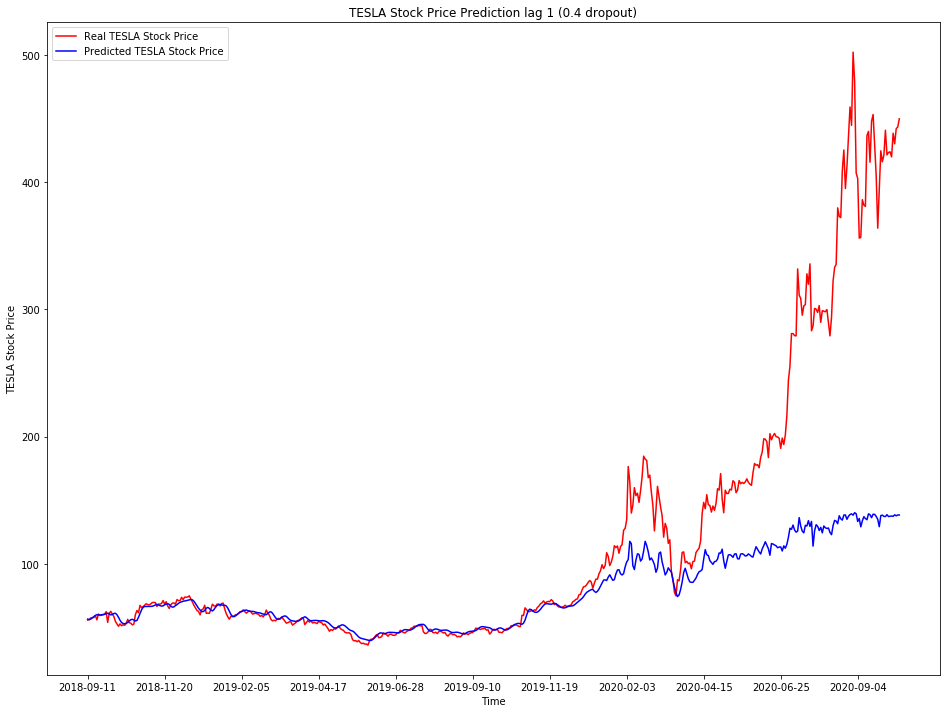

In [165]:
## 4 hidden layers, 1 days lag, 0.4 dropout rate
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.4))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.4))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.4))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.4))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 588):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,528,50))
plt.title('TESLA Stock Price Prediction lag 1 (0.4 dropout)')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
figure = plt.gcf()
figure.set_size_inches(16,12)
plt.savefig('1days_lag 4_layers dropout_0.4.jpg', dpi = 100)
plt.show()

Epoch 1/100
24/24 [==============================] - 2s 91ms/step - loss: 0.0908
Epoch 2/100
24/24 [==============================] - 2s 93ms/step - loss: 0.0296
Epoch 3/100
24/24 [==============================] - 2s 85ms/step - loss: 0.0288
Epoch 4/100
24/24 [==============================] - 2s 88ms/step - loss: 0.0310
Epoch 5/100
24/24 [==============================] - 2s 98ms/step - loss: 0.0249
Epoch 6/100
24/24 [==============================] - 2s 79ms/step - loss: 0.0208
Epoch 7/100
24/24 [==============================] - 2s 83ms/step - loss: 0.0215
Epoch 8/100
24/24 [==============================] - 2s 87ms/step - loss: 0.0210
Epoch 9/100
24/24 [==============================] - 2s 84ms/step - loss: 0.0236
Epoch 10/100
24/24 [==============================] - 2s 82ms/step - loss: 0.0213
Epoch 11/100
24/24 [==============================] - 2s 78ms/step - loss: 0.0186
Epoch 12/100
24/24 [==============================] - 2s 80ms/step - loss: 0.0174
Epoch 13/100
24/24 [=====

24/24 [==============================] - 2s 71ms/step - loss: 0.0058


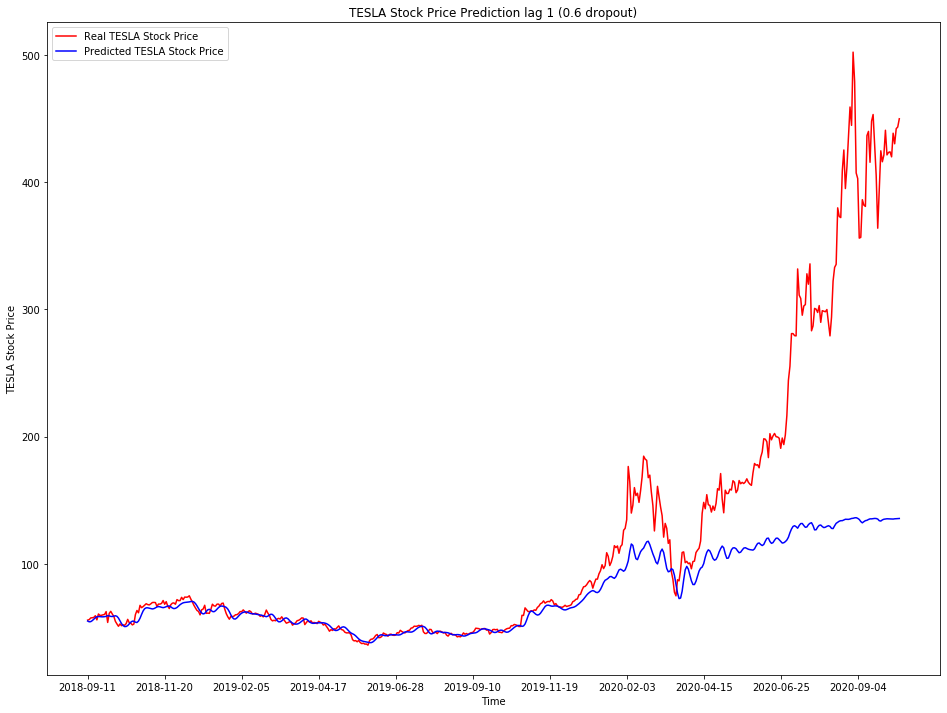

In [74]:
## 4 hidden layers, 1 days lag, 0.6 dropout rate
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.6))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.6))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.6))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.6))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 588):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,528,50))
plt.title('TESLA Stock Price Prediction lag 1 (0.6 dropout)')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
figure = plt.gcf()
figure.set_size_inches(16,12)
plt.savefig('1days_lag 4_layers dropout_0.6.jpg', dpi = 100)
plt.show()

In [191]:
## (3) predict price in two weeks
#calculate date difference
from datetime import datetime
cur_day = datetime(2020, 10, 14)
end_day = datetime(2020, 10, 28)
time_horizon = (end_day - cur_day).days

In [194]:
#get the date of following two weeks
dates = df['Date']
last_date = '2020-10-15'
timestamp_list = pd.date_range(last_date, periods = time_horizon).tolist()
datestring_list = [i.strftime("%Y-%m-%d") for i in timestamp_list] 
datestring_list

['2020-10-15',
 '2020-10-16',
 '2020-10-17',
 '2020-10-18',
 '2020-10-19',
 '2020-10-20',
 '2020-10-21',
 '2020-10-22',
 '2020-10-23',
 '2020-10-24',
 '2020-10-25',
 '2020-10-26',
 '2020-10-27',
 '2020-10-28']

In [195]:
#delete weekends
index = [2,3,9,10]
to_del = object()
for ind in index:
    datestring_list[ind] = to_del
for i in index:
    datestring_list.remove(to_del)
datestring_list

['2020-10-15',
 '2020-10-16',
 '2020-10-19',
 '2020-10-20',
 '2020-10-21',
 '2020-10-22',
 '2020-10-23',
 '2020-10-26',
 '2020-10-27',
 '2020-10-28']

In [177]:
len(datestring_list)

10

In [181]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
#get the test data
for i in range(60, 538):
    X_test.append(inputs[i-60:i, 0])

# X_test.shape[0] has 478 values, we want use the last 10 value to predict 
del X_test[0:468]
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)


(10, 60, 1)


In [184]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

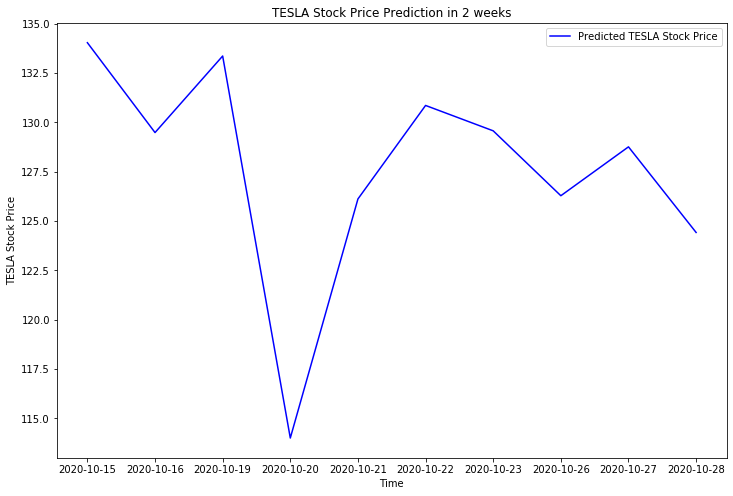

In [190]:
# Visualising the results
plt.plot(datestring_list,predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,10))
plt.title('TESLA Stock Price Prediction in 2 weeks')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
figure = plt.gcf()
figure.set_size_inches(12,8)
plt.savefig('2 weeks prediction.jpg', dpi = 100)
plt.show()